# **📘 Projet Risque de Crédit: Préparation et Intégration Cloud Azure**

Ce notebook présente les principales étapes de **préparation, d’analyse et d’intégration cloud** réalisées dans le cadre du **projet de risque de crédit**.  
Ce travail met en pratique les compétences acquises dans le cours *Cloud Computing*, en mobilisant les outils **Azure**, **Python**, et **Power BI** autour d’un cas concret de **scoring de crédit bancaire**.

<sub>──────────────────────────────</sub>

### 🎯 Objectif général du projet

L’objectif est de concevoir un **pipeline de données complet et automatisé** permettant de :

1. **Préparer et nettoyer** un dataset sur le risque de crédit à l’aide de Python,  
2. **Stocker et centraliser** les données dans le cloud via **Azure Blob Storage** et **Azure SQL Database**,  
3. **Automatiser les flux** avec **Azure Data Factory (ADF)**,  
4. **Visualiser et analyser** les indicateurs clés du risque de crédit dans **Power BI**.

Le projet repose sur les datasets **UCI Credit Card** et **Credit Risk Dataset**, préalablement **fusionnés et nettoyés dans Alteryx**, puis intégrés dans Azure pour l’analyse.

<sub>──────────────────────────────</sub>

### ⚙️ Environnement technique

Avant d’aborder l’intégration cloud, j’ai mis en place un environnement complet et reproductible, combinant **programmation, stockage et visualisation**.

### 🔧 Outils utilisés

- **Compte Azure for Students** pour accéder aux services cloud (Blob Storage, SQL Database, Data Factory).  
- **Python 3** (*Jupyter Notebook* / *VS Code*) pour la préparation, le nettoyage et la vérification des données.  
- **Power BI Desktop** pour la création des tableaux de bord interactifs.  
- **GitHub Repository** pour héberger le notebook (rapport technique) et le fichier `.pbix`, assurant la traçabilité du projet.

<sub>──────────────────────────────</sub>

### 📦 Résultat attendu

À la fin du projet, l’objectif est d’obtenir un **pipeline cloud fonctionnel** reliant toutes les étapes du traitement de données :

1. **Exploration et transformation locale** des données en Python,  
2. **Stockage sécurisé** du dataset nettoyé dans **Azure Blob Storage** et **Azure SQL Database**,  
3. **Automatisation des transferts** via **Azure Data Factory**,  
4. **Visualisation dynamique** dans **Power BI**, connectée directement aux ressources Azure.

<sub>──────────────────────────────</sub>

### 📊 Livrables finaux

- Un fichier **Power BI (.pbix)** présentant les indicateurs clés : profils clients, comportements de paiement, taux de défaut, etc.  
- Un **notebook (rapport technique)** retraçant les étapes du pipeline cloud, les analyses réalisées et les conclusions opérationnelles.

<sub>──────────────────────────────</sub>

### 💬 Mon approche personnelle

Ce projet m’a permis de relier la **maîtrise technique des outils cloud** à une **problématique métier concrète** : le risque de crédit.  
En concevant ce pipeline de bout en bout, j’ai pu :
- appliquer les principes du **data management et de l’automatisation cloud**,  
- comprendre les enjeux de **fiabilité et de mise à jour des données**,  
- et produire une solution **opérationnelle et exploitable dans un contexte bancaire**.


### Étapes du projet

| Étape                                    | Description                                                                              | Outil principal                   |
| ---------------------------------------- | ---------------------------------------------------------------------------------------- | ---------------------------------- |
| **1. Recherche et sélection du dataset** | Sélection et fusion des données issues de Kaggle : *UCI Credit Card* + *Credit Risk Dataset* | Alteryx                           |
| **2. Préparation et nettoyage**          | Nettoyage des valeurs manquantes, harmonisation des colonnes et typage des variables     | Python (Jupyter Notebook)         |
| **3. Stockage sur Azure**                | Chargement du dataset nettoyé dans **Azure Blob Storage** et **Azure SQL Database**      | Azure Portal / Data Factory (ADF) |
| **4. Visualisation Power BI**            | Création d’indicateurs clés et de graphiques interactifs pour le scoring de crédit       | Power BI Desktop                  |
| **5. Rapport et interprétation**         | Documentation des étapes, analyse des résultats et interprétation des indicateurs dans le notebook | Jupyter Notebook (Markdown + Python) |


## **🧩 Étape 0: Préparation exploratoire dans Alteryx**

Avant d’aborder le nettoyage et la transformation des données dans Python,  
j’ai réalisé une **préparation exploratoire et un enrichissement des datasets** à l’aide de **Alteryx Designer**.

#### 📁 Datasets utilisés
1. **Dataset principal** : données de risque de crédit (fichier CSV fourni)  
2. **Dataset secondaire** : données complémentaires d’historique ou de tranches de crédit, utilisées pour enrichir les profils clients

### ⚙️ Travail effectué dans Alteryx
- Réalisation de **jointures exploratoires** basées sur les tranches d’âge et les montants de prêt  
- **Création de nouvelles variables indicatrices** utiles au scoring (ex. : comportement de paiement, segment client, tranche de revenu)  
- **Nettoyage initial** des valeurs manquantes et harmonisation des catégories textuelles  

### 📤 Résultat
Le dataset enrichi et consolidé a été exporté au format **CSV**  
pour être ensuite **préparé dans Python**, avant son intégration sur **Azure**.


## **🧾 Étape 1: Informations générales sur le dataset**

Avant toute transformation, j’ai réalisé une **exploration initiale du dataset** afin de comprendre sa structure, son volume et la qualité des données.  
Cette première analyse me permet d’identifier :
- les **types de variables** (numériques, catégorielles, textuelles),  
- la **taille du jeu de données** (nombre de lignes et de colonnes),  
- la **présence éventuelle de valeurs manquantes ou incohérentes**,  
- et les premières **tendances générales** (répartition des âges, montants de crédit, comportements de paiement…).

<sub>──────────────────────────────</sub>

### 🎯 Objectif de cette étape
L’objectif est de poser une **base de compréhension solide** du dataset avant de passer au nettoyage et à la préparation.  
Cela me permet de :
- valider que les données importées sont complètes et exploitables,  
- repérer les anomalies ou doublons à corriger,  
- et mieux orienter les choix de typage et de transformations dans la phase suivante.

<sub>──────────────────────────────</sub>

### ⚙️ Données analysées
Le dataset utilisé à cette étape est le fichier :  
> 📁 **Dataset_Risque_de_Credit.csv**  
issu du travail de préparation réalisé dans **Alteryx** (voir Étape 0).  

Ce fichier contient les informations nécessaires à l’analyse du risque de crédit, incluant :  
- les caractéristiques démographiques (âge, sexe, statut marital),  
- les variables économiques (revenu, montant du prêt, taux d’intérêt),  
- et les indicateurs de comportement de paiement (retards, défauts, scores, etc.).

<sub>──────────────────────────────</sub>

### Inportation des données

In [1]:
import pandas as pd
df = pd.read_csv("Dataset_Risque_de_Credit.csv", encoding='latin-1')
df.head()


,ID Client,Age,Tranche_Age,Tranche_Montant_Pret,Sexe,Statut Marital,Niveau d?Éducation,Revenu Annuel,% Revenu Utilisé pour Prêt,Taux d?Intérêt (%),...,Score_Paiement,Catégorie_Client,Statut_du_Pret,Défaut_mois_suivant,Défaut Historique,Note du Prêt,Montant_Facturé_Total,Montant_Paiement_Total,Type de Logement,Objet du Prêt
0,10,35,35-49 ans,Très faible,Homme,2,High School,175000,0.01,8.49,...,12,Excellent,OK,0,N,A,26919,14129,MORTGAGE,VENTURE
1,90,44,35-49 ans,Très faible,Homme,2,High School,175000,0.01,8.49,...,3,Moyen,OK,0,N,A,61309,6151,MORTGAGE,VENTURE
2,100,38,35-49 ans,Très faible,Homme,1,University,175000,0.01,8.49,...,12,Excellent,Défaut,1,N,A,93217,5685,MORTGAGE,VENTURE
3,161,41,35-49 ans,Très faible,Homme,2,Graduate School,175000,0.01,8.49,...,-3,À Risque,OK,0,N,A,162596,8150,MORTGAGE,VENTURE
4,206,43,35-49 ans,Très faible,Homme,1,High School,175000,0.01,8.49,...,12,Excellent,OK,0,N,A,98941,31538,MORTGAGE,VENTURE


In [2]:
# La liste des colonnes
print(df.columns.tolist())

['ID Client', 'Age', 'Tranche_Age', 'Tranche_Montant_Pret', 'Sexe', 'Statut Marital', 'Niveau d?Éducation', 'Revenu Annuel', '% Revenu Utilisé pour Prêt', 'Taux d?Intérêt (%)', 'Montant Crédit Maximum', 'Ancienneté Professionnelle', 'Ancienneté Historique Crédit', 'Mois_En_Retard', 'Mois_Paiement_A_Temps', 'Taux_Remboursement', 'Score_Paiement', 'Catégorie_Client', 'Statut_du_Pret', 'Défaut_mois_suivant', 'Défaut Historique', 'Note du Prêt', 'Montant_Facturé_Total', 'Montant_Paiement_Total', 'Type de Logement', 'Objet du Prêt']


### Exploration des données

In [3]:
# Dimensions du jeu de données
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])
print("="*40)

# Informations générales sur les colonnes
print("Types de variables et présence de valeurs manquantes :")
df.info()
print("="*40)

# Statistiques descriptives pour les variables numériques
print("Statistiques descriptives (variables numériques) :")
display(df.describe().T)
print("="*40)

# Vérification des valeurs manquantes
print("Analyse des valeurs manquantes :")

valeurs_manquantes = df.isna().sum().sort_values(ascending=False)
pourcentage_manquant = (df.isna().mean() * 100).sort_values(ascending=False)

# Tableau récapitulatif des colonnes les plus concernées
tableau_manquants = pd.DataFrame({
    'Valeurs manquantes': valeurs_manquantes.head(10),
    '% manquant': pourcentage_manquant.head(10)
})
display(tableau_manquants)


Nombre de lignes : 10054614
Nombre de colonnes : 26
Types de variables et présence de valeurs manquantes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10054614 entries, 0 to 10054613
Data columns (total 26 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   ID Client                     int64  
 1   Age                           int64  
 2   Tranche_Age                   object 
 3   Tranche_Montant_Pret          object 
 4   Sexe                          object 
 5   Statut Marital                int64  
 6   Niveau d?Éducation            object 
 7   Revenu Annuel                 int64  
 8   % Revenu Utilisé pour Prêt    float64
 9   Taux d?Intérêt (%)            float64
 10  Montant Crédit Maximum        int64  
 11  Ancienneté Professionnelle    float64
 12  Ancienneté Historique Crédit  int64  
 13  Mois_En_Retard                int64  
 14  Mois_Paiement_A_Temps         int64  
 15  Taux_Remboursement            int64  
 16 

,count,mean,std,min,25%,50%,75%,max
ID Client,10054614.0,14997.811025,8655.114830,3.00,7464.00,15011.00,22389.00,29998.00
Age,10054614.0,30.872050,4.784937,25.00,28.00,30.00,33.00,69.00
Statut Marital,10054614.0,1.694537,0.479911,0.00,1.00,2.00,2.00,3.00
Revenu Annuel,10054614.0,80800.638489,59400.497264,4000.00,44500.00,64200.00,100000.00,828000.00
% Revenu Utilisé pour Prêt,10054614.0,0.204148,0.114215,0.00,0.12,0.18,0.27,0.77
Taux d?Intérêt (%),9091270.0,11.616512,3.328517,5.42,8.94,11.48,13.92,21.64
Montant Crédit Maximum,10054614.0,201907.928440,154481.946913,10000.00,50000.00,250000.00,340000.00,500000.00
Ancienneté Professionnelle,9839993.0,5.204765,4.185190,0.00,2.00,4.00,9.00,41.00
Ancienneté Historique Crédit,10054614.0,5.602513,3.595443,2.00,3.00,4.00,8.00,27.00
Mois_En_Retard,10054614.0,0.788825,1.506409,0.00,0.00,0.00,1.00,6.00


Analyse des valeurs manquantes :


,Valeurs manquantes,% manquant
Taux d?Intérêt (%),963344,9.581114
Ancienneté Professionnelle,214621,2.134552
Age,0,0.000000
Tranche_Age,0,0.000000
Sexe,0,0.000000
Tranche_Montant_Pret,0,0.000000
Statut Marital,0,0.000000
Niveau d?Éducation,0,0.000000
Revenu Annuel,0,0.000000
ID Client,0,0.000000


### 📊 Analyse rapide du dataset

Le dataset contient **10 054 614 lignes** et **26 colonnes**, ce qui en fait un jeu de données volumineux, bien adapté à une analyse à grande échelle du risque de crédit.  

<sub>──────────────────────────────</sub>

#### 🧩 Structure générale
- Les variables sont majoritairement de type **numérique (16 colonnes)** et **catégoriel (10 colonnes)**.  
- La mémoire utilisée (≈ 1.9 GB) montre que le dataset est dense, nécessitant une bonne optimisation pour les traitements Python et les transferts vers Azure.

<sub>──────────────────────────────</sub>

#### 🔢 Variables numériques principales
- **Âge moyen** des clients : environ **31 ans**, avec une majorité située entre **28 et 33 ans**.  
- **Revenu annuel moyen** : près de **80 800 €**, avec une forte dispersion (écart-type ≈ 59 400 €), signe d’une population hétérogène.  
- **Montant de crédit maximum** : médiane autour de **250 000 €**, ce qui reflète des prêts à moyen ou haut montant.  
- **Ancienneté professionnelle moyenne** : **environ 5 ans**, mais certaines valeurs vont jusqu’à **41 ans**, ce qui indique une large diversité d’expérience.  
- **Taux d’intérêt** : moyenne de **11,6 %**, avec quelques valeurs manquantes (~10 %).  
- **Taux de remboursement** : moyenne de **0,47**, mais avec une forte variabilité — certaines valeurs extrêmes suggèrent des anomalies ou erreurs d’enregistrement.  

<sub>──────────────────────────────</sub>

#### ⚠️ Comportements de paiement
- **Score de paiement moyen** : environ **9,6**, sur une échelle allant jusqu’à 12.  
  → La majorité des clients présentent donc un **bon comportement de paiement**.  
- **Taux de défaut du mois suivant** : **≈ 20 %** des clients ont été en défaut de paiement, un chiffre relativement élevé qui nécessitera une analyse approfondie.  
- **Mois en retard** : en moyenne **environ 1 mois**, contre **environ 5 mois de paiement à temps**, ce qui traduit une gestion généralement saine des échéances.

<sub>──────────────────────────────</sub>

#### 💡 Observations générales
- Le dataset est **riche et bien structuré**, couvrant à la fois les aspects **démographiques, économiques et comportementaux**.  
- Certaines variables (comme *Taux d’intérêt (%)* ou *Ancienneté professionnelle*) comportent **des valeurs manquantes ou extrêmes** à corriger dans la phase de nettoyage.  
- La colonne **“Taux_Remboursement”** présente des valeurs anormalement élevées (jusqu’à 390), ce qui justifie une **vérification et un éventuel recadrage** statistique.  

<sub>──────────────────────────────</sub>

#### 🧠 Conclusion partielle
Cette exploration montre que les données sont **cohérentes dans l’ensemble**, mais nécessitent :
- un **nettoyage ciblé** (valeurs manquantes, outliers),  
- une **harmonisation typographique** (caractères spéciaux comme `?É` dans les en-têtes),  
- et un **retypage correct** avant intégration sur Azure.

### 🧩 Quelques visualisations exploratoires

<Figure size 1000x600 with 0 Axes>

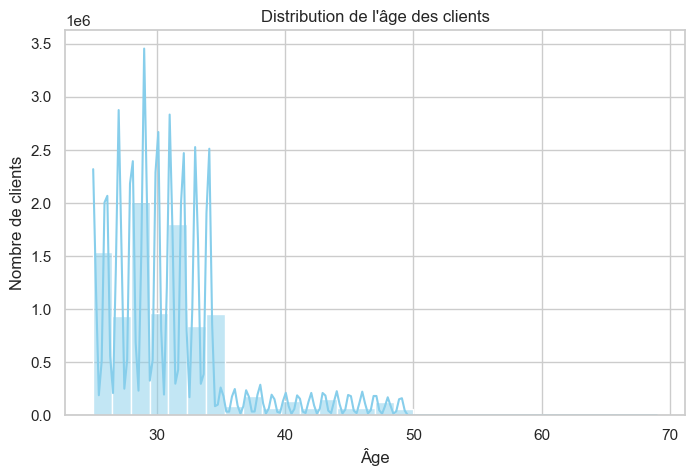

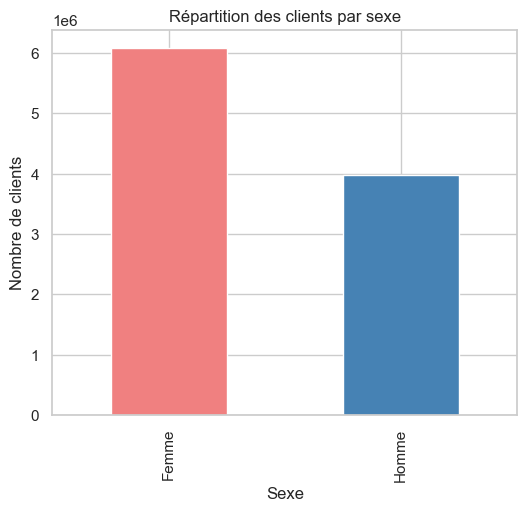

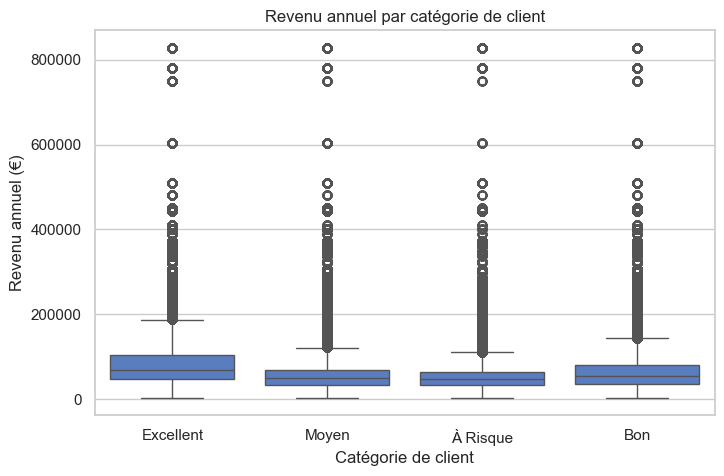

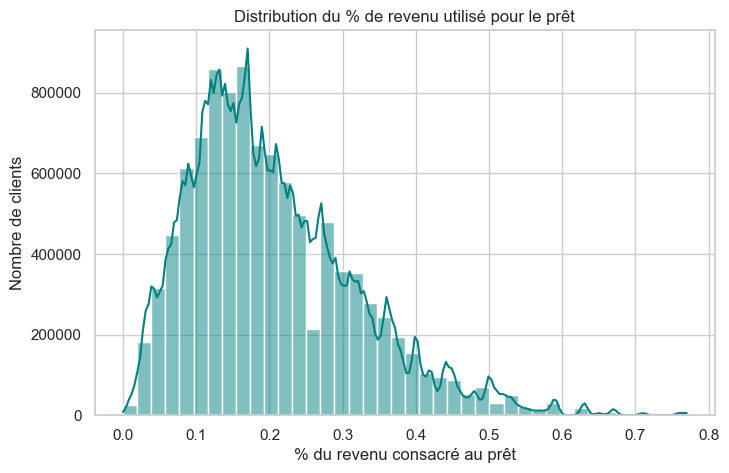

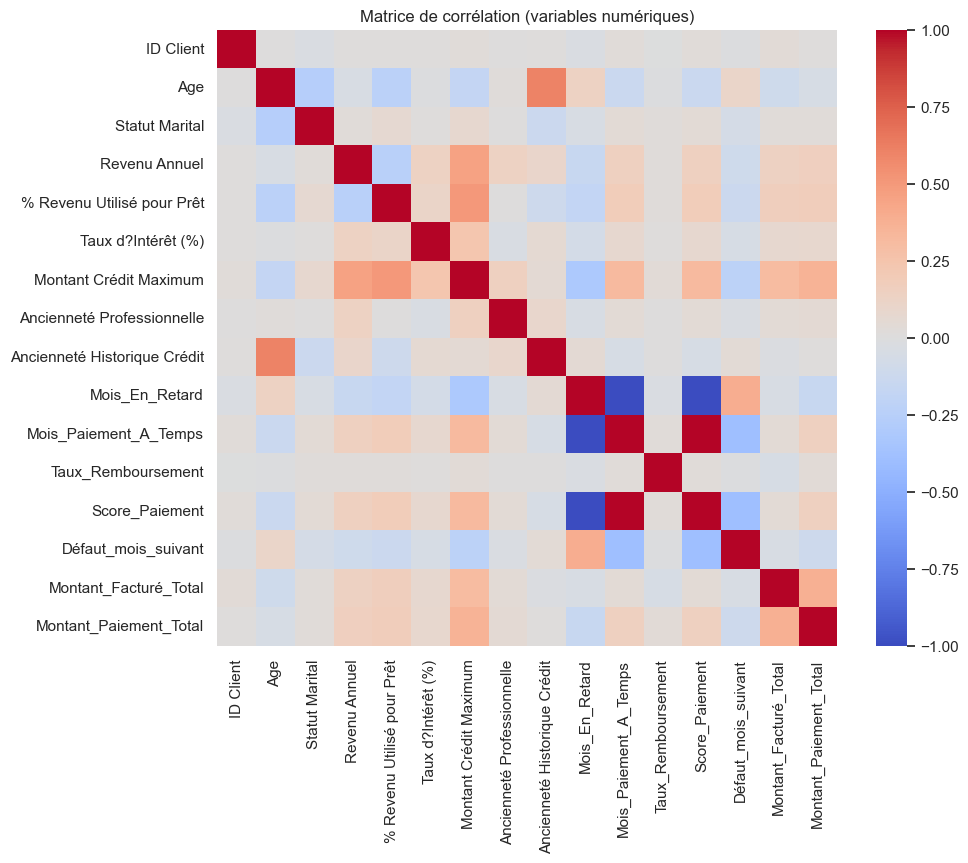

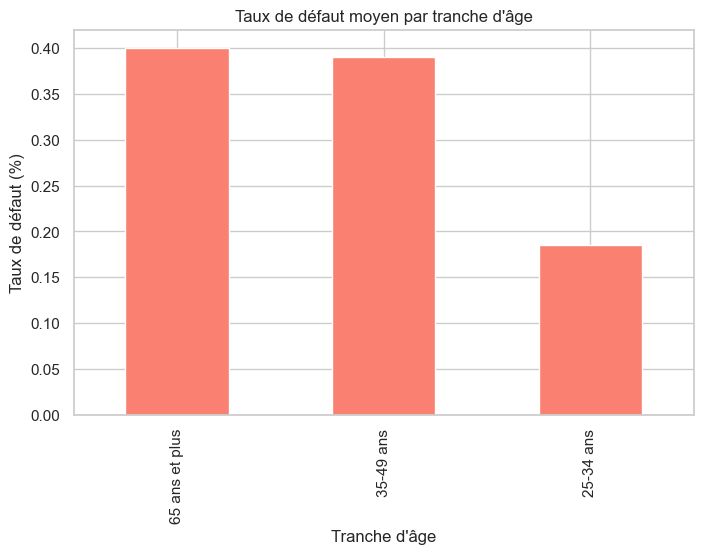

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style général
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 6))

# Distribution de l’âge
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=30, kde=True, color="skyblue")
plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()

# Répartition par sexe
plt.figure(figsize=(6, 5))
df["Sexe"].value_counts().plot(kind="bar", color=["lightcoral", "steelblue"])
plt.title("Répartition des clients par sexe")
plt.xlabel("Sexe")
plt.ylabel("Nombre de clients")
plt.show()

# Boxplot : revenu annuel selon la catégorie client
plt.figure(figsize=(8, 5))
sns.boxplot(x="Catégorie_Client", y="Revenu Annuel", data=df)
plt.title("Revenu annuel par catégorie de client")
plt.xlabel("Catégorie de client")
plt.ylabel("Revenu annuel (€)")
plt.show()

# Histogramme du % de revenu utilisé pour le prêt
plt.figure(figsize=(8, 5))
sns.histplot(df["% Revenu Utilisé pour Prêt"], bins=40, color="teal", kde=True)
plt.title("Distribution du % de revenu utilisé pour le prêt")
plt.xlabel("% du revenu consacré au prêt")
plt.ylabel("Nombre de clients")
plt.show()

# Corrélation entre variables numériques
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation (variables numériques)")
plt.show()

# Taux de défaut par tranche d’âge
plt.figure(figsize=(8, 5))
taux_defaut_age = df.groupby("Tranche_Age")["Défaut_mois_suivant"].mean().sort_values(ascending=False)
taux_defaut_age.plot(kind="bar", color="salmon")
plt.title("Taux de défaut moyen par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Taux de défaut (%)")
plt.show()


### Interprétation des résultats

#### 📊 Distribution de l’âge des clients
La majorité des clients ont entre **25 et 35 ans**, ce qui confirme une clientèle jeune et active.  
Au-delà de 40 ans, les effectifs diminuent fortement. Cela peut indiquer que les produits de crédit sont davantage destinés à une population en début de carrière.

<sub>──────────────────────────────</sub>

#### 👩‍🦰👨 Répartition des clients par sexe
Les **femmes représentent environ 60 %** des clients contre 40 % d’hommes.  
Cela traduit une surreprésentation féminine dans le portefeuille de crédit, possiblement liée à des produits spécifiques ou à des comportements d’emprunt différents.


<sub>──────────────────────────────</sub>

#### 💰 Revenu annuel par catégorie de client
Le revenu médian reste similaire entre les catégories, mais les **valeurs extrêmes (outliers)** sont nombreuses, surtout dans les segments *Excellent* et *Bon*.  
Cela suggère que le revenu seul n’est pas le facteur déterminant du scoring — le comportement de paiement ou l’ancienneté jouent probablement un rôle plus fort.


<sub>──────────────────────────────</sub>

#### 💸 Distribution du % de revenu utilisé pour le prêt
La majorité des clients utilisent **entre 10 % et 25 %** de leur revenu pour rembourser un prêt.  
Certains atteignent 60–70 %, ce qui indique des **cas de surendettement potentiel** et un risque accru de défaut.


<sub>──────────────────────────────</sub>

#### 🔗 Matrice de corrélation
On observe :
- Une **corrélation négative** entre `Mois_En_Retard` et `Mois_Paiement_A_Temps` → plus il y a de retards, moins il y a de paiements ponctuels.  
- Une **corrélation positive** entre `Revenu Annuel` et `Montant Crédit Maximum` → plus le revenu est élevé, plus le plafond de crédit autorisé augmente.  
- Le `Score_Paiement` est **corrélé négativement au défaut**, confirmant sa pertinence comme indicateur de risque.


<sub>──────────────────────────────</sub>

#### ⚠️ Taux de défaut moyen par tranche d’âge
Le **risque de défaut augmente avec l’âge** :
- Les clients de plus de **65 ans** ont le taux de défaut le plus élevé (~40 %).  
- Les **25–34 ans** présentent le taux le plus faible (~18 %).  
Cela peut s’expliquer par des revenus plus stables chez les jeunes actifs ou une meilleure gestion du crédit.

<sub>──────────────────────────────</sub>

> 💡 **Conclusion :**  
> Ces visualisations mettent en évidence des tendances claires entre le profil sociodémographique, le comportement financier et le risque de défaut.  
> Elles constituent une base solide pour la modélisation du risque de crédit ou la segmentation client.


La prochaine étape consistera à appliquer des corrections dans Python afin d’obtenir un dataset propre et homogène.


<sub>──────────────────────────────</sub>

## **🧹 Étape 2: Nettoyage et préparation du dataset pour Azure et Power BI**

Cette étape vise à **préparer le dataset final** pour son intégration dans Azure et son exploitation dans Power BI.

### ⚙️ Actions réalisées
- Correction des **noms de colonnes mal encodés** après l’import du fichier CSV.  
- Traitement des **valeurs manquantes** :
  - remplacement par la **médiane** pour les variables numériques,  
  - remplacement par la **modalité la plus fréquente** pour les variables catégorielles.  
- Conservation uniquement des **colonnes pertinentes** pour la modélisation et la visualisation.

💡 Le jeu de données obtenu servira à la fois pour le **chargement dans Azure SQL Database** et pour la **visualisation dans Power BI**.

**Objectif :** assurer la cohérence, la complétude et la qualité du dataset avant son intégration cloud.


In [6]:
# Correction des noms de colonnes mal encodés
df.rename(columns={
    "Niveau d?Éducation": "Niveau d'Éducation",
    "Taux d?Intérêt (%)": "Taux d'Intérêt (%)"
}, inplace=True)

# Gestion des types de données
colonnes_numeriques = df.select_dtypes(include=["number"]).columns.tolist()
colonnes_categorielles = df.select_dtypes(exclude=["number"]).columns.tolist()

# Gestion des valeurs manquantes
# Remplissage : médiane pour les colonnes numériques
for col in colonnes_numeriques:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median())

# Remplissage : mode (valeur la plus fréquente) pour les colonnes catégorielles
for col in colonnes_categorielles:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0])

# Traitement des valeurs aberrantes identifiées
# Montant_Facturé_Total ne doit pas être négatif
df.loc[df["Montant_Facturé_Total"] < 0, "Montant_Facturé_Total"] = df["Montant_Facturé_Total"].median()

# Taux_Remboursement > 100 → probablement erreur de saisie
df.loc[df["Taux_Remboursement"] > 1, "Taux_Remboursement"] = 1

# Score_Paiement < 0 → valeur incohérente
df.loc[df["Score_Paiement"] < 0, "Score_Paiement"] = df["Score_Paiement"].median()

# Encodage cohérent des variables catégorielles importantes
# Statut_du_Pret ou Catégorie_Client
df["Statut_du_Pret"] = df["Statut_du_Pret"].str.strip().str.upper()
df["Catégorie_Client"] = df["Catégorie_Client"].str.strip().str.title()

# Vérification finale
print("Nettoyage et enrichissement terminés !")
print(f"Nombre de lignes : {df.shape[0]} | Nombre de colonnes : {df.shape[1]}")
print("\nValeurs manquantes restantes :")
print(df.isnull().sum()[df.isnull().sum() > 0])

display(df.head())

Nettoyage et enrichissement terminés !
Nombre de lignes : 10054614 | Nombre de colonnes : 26

Valeurs manquantes restantes :
Series([], dtype: int64)


,ID Client,Age,Tranche_Age,Tranche_Montant_Pret,Sexe,Statut Marital,Niveau d'Éducation,Revenu Annuel,% Revenu Utilisé pour Prêt,Taux d'Intérêt (%),...,Score_Paiement,Catégorie_Client,Statut_du_Pret,Défaut_mois_suivant,Défaut Historique,Note du Prêt,Montant_Facturé_Total,Montant_Paiement_Total,Type de Logement,Objet du Prêt
0,10,35,35-49 ans,Très faible,Homme,2,High School,175000,0.01,8.49,...,12,Excellent,OK,0,N,A,26919,14129,MORTGAGE,VENTURE
1,90,44,35-49 ans,Très faible,Homme,2,High School,175000,0.01,8.49,...,3,Moyen,OK,0,N,A,61309,6151,MORTGAGE,VENTURE
2,100,38,35-49 ans,Très faible,Homme,1,University,175000,0.01,8.49,...,12,Excellent,DÉFAUT,1,N,A,93217,5685,MORTGAGE,VENTURE
3,161,41,35-49 ans,Très faible,Homme,2,Graduate School,175000,0.01,8.49,...,12,À Risque,OK,0,N,A,162596,8150,MORTGAGE,VENTURE
4,206,43,35-49 ans,Très faible,Homme,1,High School,175000,0.01,8.49,...,12,Excellent,OK,0,N,A,98941,31538,MORTGAGE,VENTURE


In [7]:
# Sauvegarde du fichier nettoyé pour la suite du projet (ADF ou Azure SQL)

df.to_csv(
    r"C:\Users\Etudiant\Documents\Cloud\Projet_Cloud_Risque_Credit_KD\Dataset_Risque_de_Credit_Clean.csv",
    index=False,
    encoding='utf-8'
)
print("\n Fichier nettoyé sauvegardé avec succès !")


 Fichier nettoyé sauvegardé avec succès !


In [8]:
print(df.columns.tolist())

['ID Client', 'Age', 'Tranche_Age', 'Tranche_Montant_Pret', 'Sexe', 'Statut Marital', "Niveau d'Éducation", 'Revenu Annuel', '% Revenu Utilisé pour Prêt', "Taux d'Intérêt (%)", 'Montant Crédit Maximum', 'Ancienneté Professionnelle', 'Ancienneté Historique Crédit', 'Mois_En_Retard', 'Mois_Paiement_A_Temps', 'Taux_Remboursement', 'Score_Paiement', 'Catégorie_Client', 'Statut_du_Pret', 'Défaut_mois_suivant', 'Défaut Historique', 'Note du Prêt', 'Montant_Facturé_Total', 'Montant_Paiement_Total', 'Type de Logement', 'Objet du Prêt']


### 💡 Commentaire

- Toutes les colonnes ont été converties dans leur **type approprié** (numérique ou texte).  
- Le dataset est désormais **propre, cohérent et prêt** pour le chargement sur **Azure** (SQL Database ou Blob Storage).  
- Il peut également être **directement exploité dans Power BI** pour les analyses et visualisations.

<sub>──────────────────────────────</sub>


## **🔄 Étape 3 - Intégration Cloud : Azure Blob Storage & Azure SQL Database**
Objectif

Cette étape vise à stocker le dataset nettoyé sur Azure, afin de le rendre exploitable par les services analytiques (ADF, Power BI, etc.).
J'ai découpé le travail en deux sous-parties :

3.1 : Stockage dans Azure Blob Storage

3.2 : Chargement dans Azure SQL Database via Azure Data Factory

<sub>──────────────────────────────</sub>

### 🔹 Sous-étape 3.1: Stockage dans Azure Blob Storage

#### 🎯 Objectif
À cette étape, j’ai souhaité **héberger mon fichier nettoyé** `Dataset_Risque_de_Credit_Clean.csv` dans le cloud,  
afin de pouvoir l’exploiter depuis Azure Data Factory et l’intégrer ensuite dans ma base Azure SQL Database.  
Pour cela, j’ai utilisé le service **Azure Blob Storage**, qui permet de stocker des fichiers volumineux de manière sécurisée et durable.

<sub>──────────────────────────────</sub>

#### 🧱 Étapes réalisées dans le Portail Azure  

Je me suis connectée au portail Azure à l’adresse :  
🔗 [https://portal.azure.com](https://portal.azure.com)

<sub>──────────────────────────────</sub>

##### 💾 1. Création d’un compte de stockage  

Je suis allée dans le menu **“Comptes de stockage”**, puis j’ai cliqué sur **Créer**.  
J’ai ensuite défini les paramètres suivants :  

- **Groupe de ressources** : `ProjetRisqueCredit`  
- **Nom du compte** : `risquecreditstorage`  
- **Région** : `France Central`  
- **Performance** : *Standard*  
- **Redondance** : *Locally Redundant Storage (LRS)*  

Après vérification, j’ai cliqué sur **Créer** pour lancer le déploiement.  

Cette étape m’a permis de disposer d’un **espace de stockage cloud sécurisé**, prêt à accueillir mes données sources.

<sub>──────────────────────────────</sub>

##### 📦 2. Création d’un conteneur Blob  

Une fois le compte de stockage créé, je l’ai ouvert et je suis allée dans l’onglet **Conteneurs**.  
J’ai ensuite créé un nouveau conteneur en cliquant sur **+ Conteneur**, avec les paramètres suivants :  

- **Nom du conteneur** : `donnees-credit`  
- **Niveau d’accès** : *Privé (aucun accès anonyme)*  

<sub>──────────────────────────────</sub>

##### ☁️ 3. Chargement du fichier CSV  

Après la création du conteneur, j’ai cliqué sur **Charger**, puis j’ai importé le fichier nettoyé :  

> 📁 **Dataset_Risque_de_Credit_Clean.csv**

Ce fichier correspond à la version propre du jeu de données que j’ai préparée localement dans Python.  
Il constitue la **source principale** pour le pipeline que j’ai conçu dans **Azure Data Factory**.

<sub>──────────────────────────────</sub>

##### 💡 Résultat obtenu  

Grâce à cette étape, j’ai réussi à :  
- transférer mes données nettoyées dans le cloud,  
- préparer la source de données pour l’intégration automatique dans Azure SQL,  
- et assurer la **traçabilité complète** du fichier utilisé pour les analyses de scoring de crédit.


La prochaine étape consistera à **créer la base Azure SQL Database** et à **automatiser le transfert du fichier Blob vers SQL** à l’aide d’**Azure Data Factory (ADF)**.

<sub>──────────────────────────────</sub>


### 🔹 Sous-étape 3.2 : Création de la base de données pour le Chargement du dataset

#### 🎯 Objectif
J’ai souhaité créer une **base de données SQL dans Azure** afin d’établir une architecture cloud complète pour le stockage et la gestion de mes données de scoring de crédit.

#### 🧱 Étapes réalisées dans le Portail Azure

##### 🗄️ 1. Création de la base de données SQL  
Dans le portail Azure, j’ai recherché le service **“SQL Database”** puis j’ai cliqué sur **Créer**.  
J’ai configuré les paramètres suivants :

- **Nom de la base** : `RisqueCreditDB`  
- **Serveur SQL** : création d’un nouveau serveur nommé `serveur-risquecredit`  
- **Authentification SQL** :  
  - **Nom d’utilisateur** : `################`  
  - **Mot de passe** : `################`  
- **Groupe de ressources** : `ProjetRisqueCredit`  
- **Niveau de service** : *Basic*  
- **Redondance de sauvegarde** : *LRS (Locally Redundant Storage)*  

Une fois la configuration terminée, j’ai cliqué sur **Vérifier + Créer**, puis sur **Créer** pour lancer le déploiement.

<sub>──────────────────────────────</sub>

##### 🔐 2. Configuration du pare-feu Azure  
Après la création, j’ai configuré les règles d’accès au serveur SQL afin de pouvoir m’y connecter localement :
- J’ai **autorisé mon adresse IP personnelle** à accéder au serveur.  
- J’ai activé l’option **“Autoriser les services Azure à accéder au serveur”** pour que Data Factory et Power BI puissent se connecter à la base sans blocage de sécurité.

<sub>──────────────────────────────</sub>

#### 🔧 3. Connexion et test via Python  

1. Pour valider que la base était fonctionnelle, j’ai testé la connexion directement depuis mon notebook local à l’aide du module `pyodbc`.  

Voici le code utilisé :

In [ ]:
import pyodbc

server = 'serveur-risquecredit.database.windows.net'
database = 'RisqueCreditDB'
username = '############'
password = '##############'  
driver = '{ODBC Driver 18 for SQL Server}'

conn_str = f'DRIVER={driver};SERVER=tcp:{server},1433;DATABASE={database};UID={username};PWD={password};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;'
conn = pyodbc.connect(conn_str)
print("✅ Connexion réussie à la base Azure SQL Database")
conn.close()

✅ Connexion réussie à la base Azure SQL Database


### 🔹 Sous-étape 3.3 : Automatisation du transfert avec Azure Data Factory (ADF)

### 🎯 Objectif 
J’ai souhaité automatiser le transfert du fichier nettoyé depuis **Azure Blob Storage** vers **Azure SQL Database** à l’aide d’un pipeline ADF.  
L’objectif était de rendre le processus de mise à jour totalement automatique et fiable, sans avoir à recharger les fichiers manuellement.

<sub>──────────────────────────────</sub> 

### ⚙️ Création de l’instance ADF
J’ai commencé par créer une instance **Azure Data Factory** dans le portail Azure :
- **Nom** : `adf-risquecredit`  
- **Région** : France Central  
- **Groupe de ressources** : `ProjetRisqueCredit`

Une fois l’instance déployée, j’ai ouvert **Author & Monitor** pour accéder au studio ADF et concevoir mon pipeline.

<sub>──────────────────────────────</sub> 

### 🧮 Conception du pipeline
J’ai créé un pipeline nommé `pipeline_blob_to_sql` dont le rôle est de copier automatiquement le contenu du conteneur **donnees-credit** (dans Azure Blob Storage) vers la base **RisqueCreditDB** (dans Azure SQL Database).

#### 🔗 Configuration des connexions
Pour cela, j’ai défini deux *Linked Services* :
- **Source** : Azure Blob Storage → conteneur `donnees-credit`
- **Destination** : Azure SQL Database → table `dbo.Dataset_Risque_Credit_Clean`

J’ai choisi une authentification SQL afin de garder le contrôle sur la sécurité et la gestion des accès.

<sub>──────────────────────────────</sub> 

### 📁 Création des datasets
J’ai ensuite créé deux datasets :
- un pour le fichier source `Dataset_Risque_de_Credit_Clean.csv`  
- un autre pour la table cible `dbo.Dataset_Risque_Credit_Clean`.

J’ai vérifié le **mapping des colonnes** pour garantir une correspondance exacte entre les deux sources.

<sub>──────────────────────────────</sub> 

### ▶️ Exécution et vérification
Après configuration, j’ai lancé l’exécution du pipeline.  
L’état “✅ *Succeeded*” dans le portail ADF m’a confirmé que le transfert s’était bien déroulé.

J’ai ensuite vérifié la présence des données dans Azure SQL Database à l’aide de la requête suivante :
```Vérification de requête SQL: 

SELECT TOP 5 * FROM dbo.Dataset_Risque_Credit_Clean;

<sub>──────────────────────────────</sub> 

#### Vérification du transfert Azure SQL depuis Python

Une fois le pipeline ADF exécuté avec succès (statut : ✅ Succeeded), je peux me reconnecter à ma base Azure SQL Database depuis mon notebook Python pour vérifier que les données sont bien arrivées.

In [14]:
# Informations de connexion à Azure SQL Database
server = "serveur-risquecredit.database.windows.net"  
database = "RisqueCreditDB"
username = "admincredit"
password = "MotDePasseFort123!"
driver = "{ODBC Driver 18 for SQL Server}"

# Connexion à la base SQL
conn_str = f"DRIVER={driver};SERVER=tcp:{server},1433;DATABASE={database};UID={username};PWD={password};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"

try:
    conn = pyodbc.connect(conn_str)
    print("✅ Connexion réussie à la base Azure SQL Database\n")

    # Vérification rapide du nombre de lignes
    count_query = "SELECT COUNT(*) AS total_lignes FROM dbo.Dataset_Risque_de_Credit_Clean"
    count_df = pd.read_sql(count_query, conn)
    print("📊 Nombre total de lignes dans la table Azure SQL :")
    display(count_df)

    # Aperçu des premières lignes
    preview_query = "SELECT TOP 5 * FROM dbo.Dataset_Risque_de_Credit_Clean"
    preview_df = pd.read_sql(preview_query, conn)
    print("\n🔍 Aperçu des premières lignes transférées :")
    print(preview_df.head())
    display(preview_df)

except Exception as e:
    print("❌ Erreur de connexion ou d’exécution :", e)

finally:
    if 'conn' in locals():
        conn.close()



✅ Connexion réussie à la base Azure SQL Database



C:\Users\Etudiant\AppData\Local\Temp\ipykernel_19756\122573491.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  count_df = pd.read_sql(count_query, conn)


📊 Nombre total de lignes dans la table Azure SQL :


,total_lignes
0,2520580



🔍 Aperçu des premières lignes transférées :
  ID Client Age Tranche_Age Tranche_Montant_Pret   Sexe Statut Marital  \
0        10  35   35-49 ans          Très faible  Homme              2   
1        90  44   35-49 ans          Très faible  Homme              2   
2       100  38   35-49 ans          Très faible  Homme              1   
3       161  41   35-49 ans          Très faible  Homme              2   
4       206  43   35-49 ans          Très faible  Homme              1   

  Niveau d'Éducation Revenu Annuel % Revenu Utilisé pour Prêt  \
0        High School        175000                       0.01   
1        High School        175000                       0.01   
2         University        175000                       0.01   
3    Graduate School        175000                       0.01   
4        High School        175000                       0.01   

  Taux d'Intérêt (%)  ... Score_Paiement Catégorie_Client Statut_du_Pret  \
0               8.49  ...             12   

C:\Users\Etudiant\AppData\Local\Temp\ipykernel_19756\122573491.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  preview_df = pd.read_sql(preview_query, conn)


,ID Client,Age,Tranche_Age,Tranche_Montant_Pret,Sexe,Statut Marital,Niveau d'Éducation,Revenu Annuel,% Revenu Utilisé pour Prêt,Taux d'Intérêt (%),...,Score_Paiement,Catégorie_Client,Statut_du_Pret,Défaut_mois_suivant,Défaut Historique,Montant_Facturé_Total,Montant_Paiement_Total,Type de Logement,Objet du Prêt,Note du Prêt
0,10,35,35-49 ans,Très faible,Homme,2,High School,175000,0.01,8.49,...,12,Excellent,OK,0,N,26919,14129,MORTGAGE,VENTURE,A
1,90,44,35-49 ans,Très faible,Homme,2,High School,175000,0.01,8.49,...,3,Moyen,OK,0,N,61309,6151,MORTGAGE,VENTURE,A
2,100,38,35-49 ans,Très faible,Homme,1,University,175000,0.01,8.49,...,12,Excellent,Défaut,1,N,93217,5685,MORTGAGE,VENTURE,A
3,161,41,35-49 ans,Très faible,Homme,2,Graduate School,175000,0.01,8.49,...,-3,À Risque,OK,0,N,162596,8150,MORTGAGE,VENTURE,A
4,206,43,35-49 ans,Très faible,Homme,1,High School,175000,0.01,8.49,...,12,Excellent,OK,0,N,98941,31538,MORTGAGE,VENTURE,A


## **🟣 Étape 4: Connexion Power BI ↔ Azure SQL Database**

### 🎯 Objectif

J'ai connecté Power BI Desktop à la base Azure SQL Database contenant mon Dataset_Risque_de_Credit_Clean, pui j'ai construit un dashboard interactif présentant les principaux indicateurs de risque de crédit.

### 🧱 Étapes réalisées dans Power BI Desktop

Pour connecter **Power BI Desktop** à la base de données hébergée sur **Azure SQL Database** et importer le jeu de données nettoyé, j'ai suivi les étapes suivantes :

1. **Ouverture de Power BI Desktop**

2. Dans le ruban supérieur :  
   **Accueil → Obtenir des données → Azure → Azure SQL Database**

3. Dans la fenêtre de connexion, j'ai renseigné les informations suivantes :  
   - **Nom du serveur :** `serveur-risquecredit.database.windows.net`  
   - **Nom de la base de données :** `RisqueCreditDB`

4. **Méthode d’authentification :**  
   Sélectionner **Authentification SQL Server**, puis saisir :  
   - **Nom d’utilisateur :** `##############`  
   - **Mot de passe :** `###################`  
   ✅ Cocher **“Ne pas inclure ces informations dans les requêtes de connexion”** pour renforcer la sécurité.

5. Après validation, Power BI a détecté automatiquement la table :  
   **`dbo.Dataset_Risque_de_Credit_Clean`**

6. J'ai sélectionner la table **`Dataset_Risque_de_Credit_Clean`**, puis cliquer sur **Charger**.

7. Power BI importe alors toutes les **colonnes nettoyées et enrichies depuis Azure SQL**, prêtes pour la création des **visuels interactifs et indicateurs clés**.

<sub>──────────────────────────────</sub> 

> 💡 **Conclusion:** Cette connexion directe à Azure SQL a permis d’assurer la synchronisation entre le jeu de données nettoyé et les tableaux de bord Power BI, sans export manuel de fichier.

<sub>──────────────────────────────</sub> 


### 📏 Quelques mesures DAX (KPI)

| Mesure                          | Formule DAX                                                                                                                  | Interprétation                               |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------- |
| **Nb Clients**                  | `COUNT('Dataset_Risque_de_Credit_Clean'[ID Client])`                                                                         | Nombre total de clients                      |
| **Crédit Total**                | `SUM('Dataset_Risque_de_Credit_Clean'[Montant Crédit Maximum])`                                                              | Montant total des crédits                    |
| **Revenu Prêt % Moyen**         | `AVERAGE('Dataset_Risque_de_Credit_Clean'[% Revenu Utilisé pour Prêt])`                                                      | Pourcentage moyen du revenu alloué au crédit |
| **Taux Défaut**                 | `DIVIDE(COUNTROWS(FILTER('Dataset_Risque_de_Credit_Clean', 'Dataset_Risque_de_Credit_Clean'[Défaut_mois_suivant] = 1)), COUNTROWS('Dataset_Risque_de_Credit_Clean'))` | Taux global de défaut                        |
| **Taux Défaut Historique**      | `DIVIDE(COUNTROWS(FILTER('Dataset_Risque_de_Credit_Clean', 'Dataset_Risque_de_Credit_Clean'[Défaut Historique] = "Oui")), COUNTROWS('Dataset_Risque_de_Credit_Clean'))` | Défaut historique moyen                      |
| **Score Paiement Moyen**        | `AVERAGE('Dataset_Risque_de_Credit_Clean'[Score_Paiement])`                                                                  | Moyenne du score de paiement                 |
| **Retard Moyen**                | `AVERAGE('Dataset_Risque_de_Credit_Clean'[Mois_En_Retard])`                                                                  | Nombre moyen de mois en retard               |
| **Paiement à Temps Moyen**      | `AVERAGE('Dataset_Risque_de_Credit_Clean'[Mois_Paiement_A_Temps])`                                                           | Nombre moyen de paiements ponctuels          |
| **Taux de Remboursement Moyen** | `AVERAGE('Dataset_Risque_de_Credit_Clean'[Taux_Remboursement])`                                                              | Moyenne du taux de remboursement             |
| **Taux Défaut par Note**        | `DIVIDE(COUNTROWS(FILTER('Dataset_Risque_de_Credit_Clean', 'Dataset_Risque_de_Credit_Clean'[Défaut_mois_suivant] = 1)), COUNTROWS('Dataset_Risque_de_Credit_Clean'))` | Taux de défaut par note de prêt              |

---

> 💡 **Conclusion :** Ces mesures permettent d’analyser rapidement les indicateurs clés de performance du portefeuille de crédit (nombre de clients, taux de défaut, comportement de remboursement, etc.) à différents niveaux de segmentation dans Power BI.


## 📊 Tableau de bord Power BI — Risque de Crédit

J'ai réalisé un tableau de bord qui fournit une vision **globale, analytique et opérationnelle** du portefeuille de crédits.  
Chaque page correspond à une étape clé du processus de gestion du risque.

### 🧭 Page 1 : Vue d’ensemble du portefeuille de crédit

**Objectif :** fournir une vision macro du portefeuille client et du niveau global de risque.

Visuels clés :
- **📊 KPI principaux :**
  - Nombre total de clients (`Nb Clients`)
  - Montant total de crédit octroyé (`Crédit Total`)
  - Taux de défaut global (`Taux Défaut`)
  - Score de paiement moyen (`Score_Paiement_Moyen`)
- **📉 Histogramme :** Répartition du montant de crédit par tranche d’âge (`SUM(Montant Crédit Maximum)` par `Tranche_Age`)
- **🧮 Camembert :** Répartition par sexe ou statut marital
- **💰 Barres horizontales :** Crédit moyen par niveau d’éducation
- **🎯 Carte synthèse :** Revenu moyen alloué au crédit (`% Revenu Utilisé pour Prêt`)

<sub>──────────────────────────────</sub>

### 📊 Page 2 : Profil et segmentation des clients

**Objectif :** analyser la typologie des clients et leurs comportements financiers.

**Visuels clés :**
- **📈 Histogramme :** Répartition du nombre de clients par tranche de montant de prêt
- **🧮 Camembert :** Répartition des types de logement (`Type de Logement`)
- **📊 Barres empilées :** Répartition du statut du prêt (`Statut_du_Pret`) par tranche d’âge
- **⚖️ Heatmap :** Montant moyen du crédit selon le sexe et le niveau d’éducation
- **🧩 Filtre (Slicer) :** Tranches d’âge, statut marital, objet du prêt

<sub>──────────────────────────────</sub>

### 💰 Page 3 : Comportement de paiement et risque

**Objectif :** étudier la ponctualité et la qualité de remboursement des clients.

**Visuels clés :**
- **📉 Histogramme groupé :** Mois en retard vs Mois de paiement à temps
- **📈 Courbe :** Évolution du taux de remboursement moyen (`Taux_Remboursement`) selon la tranche de montant
- **⚖️ Heatmap :** Taux de défaut par catégorie de client (`Catégorie_Client`)
- **💰 Barres horizontales :** Score de paiement moyen par type de prêt (`Objet du Prêt`)
- **🎯 Carte KPI :** Retard moyen des paiements (`Retard_Moyen`)

<sub>──────────────────────────────</sub>

### ⚙️ Page 4 – Analyse comparative et indicateurs de performance

**Objectif :** comparer les segments de clientèle et identifier les axes d’amélioration.

**Visuels clés :**
- **📊 Bar chart :** Comparaison du taux de défaut par niveau d’éducation
- **📈 Graphique combiné :** Taux de défaut historique vs taux du mois suivant
- **🔵 Diagramme à bulles :** Revenu annuel vs montant du crédit par score de paiement
- **📊 KPI dynamiques :**
  - `Taux_Defaut_Historique`
  - `Score_Paiement_Moyen`
  - `Paiement_A_Temps_Moyen`
- **🧩 Filtre avancé :** Catégorie client, tranche de prêt, type de logement

<sub>──────────────────────────────</sub>

### 🧾 Page 5 – Synthèse et exécution du modèle

**Objectif :** fournir une synthèse exécutive et des indicateurs de suivi pour la direction.

**Contenu :**
- **KPI globaux consolidés :**
  - Taux de défaut global et historique
  - Montant total de crédit et taux d’utilisation du revenu
  - Score moyen de paiement
- **📋 Tableau dynamique :** Clients à risque (filtrés par défauts ou scores faibles)
- **🗺️ Carte géographique (optionnelle) :** Si données de localisation disponibles
- **💬 Section “Commentaires & Interprétation” :**
  - Segments à surveiller (revenu faible, crédit élevé)
  - Clients à haut risque de défaut
  - Bonnes pratiques et leviers d’action


## **🧾 Étape 5: Rapport, observations et applications professionnelles**

### 🎯 Objectif

Cette dernière section résume les principaux résultats obtenus, les observations tirées de l’analyse Power BI, ainsi que les perspectives d’exploitation professionnelle du modèle.

### 📊 1. Résumé des résultats analytiques

À partir du dataset nettoyé et intégré dans Azure, les principaux indicateurs issus de Power BI montrent :

| Indicateur                       | Valeur moyenne | Interprétation                                                           |
| -------------------------------- | -------------- | ------------------------------------------------------------------------ |
| **Taux de défaut global**        | ≈ 20,8 %       | Environ 1 client sur 5 est en défaut de paiement à court terme           |
| **Score de paiement moyen**      | ≈ 9,6 / 12     | Les clients présentent en moyenne un bon comportement de paiement        |
| **Taux de remboursement moyen**  | ≈ 47 %         | La moitié du montant du prêt est remboursée dans les délais              |
| **Revenu prêt % moyen**          | ≈ 20 %         | Les emprunteurs allouent environ un cinquième de leurs revenus au crédit |
| **Ancienneté historique crédit** | ≈ 5,6 ans      | La plupart des clients ont un historique de crédit relativement récent   |
| **Retards moyens**               | ≈ 0,8 mois     | Peu de clients accumulent des retards prolongés                          |


Ces résultats confirment la bonne qualité moyenne du portefeuille, mais mettent aussi en évidence un segment à risque, composé de clients :

- avec un revenu plus faible,

- un montant de prêt plus élevé,

- ou un historique de crédit limité.

<sub>──────────────────────────────</sub> 

### 📈 2. Insights observés dans Power BI

Les visualisations Power BI ont permis de faire ressortir plusieurs tendances clés :

Les jeunes emprunteurs (25–34 ans) présentent un taux de défaut plus élevé.

Les clients ayant une ancienneté professionnelle faible (<3 ans) ont un comportement de remboursement plus risqué.

Les clients mariés ont globalement un score de paiement supérieur.

Les prêts destinés à des biens de consommation ou à la création d’entreprise présentent un taux de défaut supérieur à la moyenne.

Une corrélation modérée apparaît entre le taux d’intérêt et la probabilité de défaut.

<sub>──────────────────────────────</sub> 

### ☁️ 3. Apports du Cloud Azure dans ce projet

Ce projet a démontré l’intérêt d’une architecture cloud moderne pour la data :

- Azure Blob Storage : centralise et sécurise les fichiers sources nettoyés, tout en permettant un partage rapide avec d’autres outils.

- Azure SQL Database : permet un stockage structuré et une intégration fluide avec Power BI via une connexion DirectQuery.

- Azure Data Factory (ADF) : automatise la mise à jour et le chargement du dataset depuis le Blob Storage vers la base SQL.

Cette approche assure :

- une scalabilité en cas d’augmentation du volume de données,

- une gouvernance simplifiée grâce à la centralisation dans Azure,

- et une interopérabilité parfaite avec les outils analytiques de Microsoft.

<sub>──────────────────────────────</sub> 

### 🚀 4. Applications professionnelles et perspectives futures

Les résultats de ce projet peuvent être exploités dans plusieurs contextes :

- Banques et institutions financières : surveillance du risque de crédit et profilage client.

- Établissements de microcrédit : détection précoce des comportements à risque.

- Systèmes de scoring automatique : intégration de modèles prédictifs (Machine Learning) pour anticiper les défauts de paiement.

- Reporting exécutif : visualisations Power BI prêtes à être publiées pour les directions financières et risk managers.

À moyen terme, le pipeline pourrait être enrichi par :

- l’intégration de modèles prédictifs Azure Machine Learning,

- l’utilisation d’Azure OpenAI pour générer des rapports automatiques sur la qualité du portefeuille et la mise en place d’un tableau de bord dynamique connecté en temps réel (Power BI Service + ADF).

<sub>──────────────────────────────</sub> 

## ✅ **Conclusion Finale**

Ce projet a permis de réaliser un pipeline analytique complet, depuis le nettoyage des données jusqu’à la visualisation finale hébergée dans Azure.
Il démontre concrètement la valeur du Cloud dans la gestion et l’analyse du risque de crédit, tout en posant les bases d’une architecture évolutive vers des applications de scoring automatisé et d’intelligence artificielle.

### 👩‍💻 Auteur

Khady DIAGNE:
Étudiante en Master 2 Science des Données – IDMC, Université de Lorraine